# Onramp Data Engineering Project

### Importing Packages

In [25]:
# pulling data from spotify
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

# viewing data samples
import pprint

# building dataframes
import pandas as pd

# testing resource use
import timeit
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


### Using spofity app creditentials storted in system setting

In [26]:
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

## Section 1: Requesting the data

### Creating a list of favorite artists

In [27]:
search_artists = ["Wild Child", "Tessa Violet", "Halsey", "OK Go",
                  "Regina Spektor", "Modest Mouse", "The Killers",
                  "the GazettE", "Dolly Parton", "Ed Sheeran",
                  "The Vaccines", "Bloc Party", "Simple Plan",
                  "Creedence Clearwater Revival", "Miike Snow",
                  "Adele", "Grace VanderWaal", "Simple Plan",
                  "blink-182", "MIYAVI"]

### Creating a list of columns for each of the tables

In [28]:
# df_artist
artist_table_columns = ['artist_id', 'artist_name', 'external_url', 
                        'genre', 'image_url', 'followers', 'popularity', 
                        'type', 'artist_uri']

# df_album
album_table_columns = ['album_id', 'album_name', 'external_url', 
                       'image_url', 'release_date', 'total_tracks', 
                       'type', 'album_uri', 'artist_id']

# df_track
track_table_columns = ['track_id', 'song_name', 'external_url', 'duration_ms', 
                       'explicit', 'disc_number', 'type', 'song_uri', 'album_id']

# df_track_feature
track_feature_table_columns = ['track_id', 'danceability', 'energy', 
                               'instrumentalness', 'liveness', 'loudness', 
                               'speechiness', 'tempo', 'type', 'valence', 'song_uri']

In [29]:
df_artist = pd.DataFrame(columns = artist_table_columns)
df_album = pd.DataFrame(columns = album_table_columns)
df_track = pd.DataFrame(columns = track_table_columns)
df_track_feature = pd.DataFrame(columns = track_feature_table_columns)

## 1.1 Pulling Sample Data
I will pull a sample of the data for each data table using the spotipy package. This will be usefull for building the functions that will populate the dataframes. The pprint package will be useful for this since it will make the pulled data much easier to read.

### 1.1.1 Artist data sample

In [30]:
# only pulling the first result because I do not want potentially multiple artists with the same name
# testing the connection and printing out any errors with an excetpion statement
try: 
    pprint.pprint(sp.search(q="Wild Child", type="artist")['artists']['items'][0])
except Exception as e:
    print(e)

{'external_urls': {'spotify': 'https://open.spotify.com/artist/1xLMexpeeTKQ20SwGMaGSK'},
 'followers': {'href': None, 'total': 144690},
 'genres': ['austin americana',
            'austindie',
            'deep new americana',
            'folk-pop',
            'indie folk',
            'new americana',
            'stomp and holler'],
 'href': 'https://api.spotify.com/v1/artists/1xLMexpeeTKQ20SwGMaGSK',
 'id': '1xLMexpeeTKQ20SwGMaGSK',
 'images': [{'height': 640,
             'url': 'https://i.scdn.co/image/ab6761610000e5eb4d4c9f66cfdd382224ce68f2',
             'width': 640},
            {'height': 320,
             'url': 'https://i.scdn.co/image/ab676161000051744d4c9f66cfdd382224ce68f2',
             'width': 320},
            {'height': 160,
             'url': 'https://i.scdn.co/image/ab6761610000f1784d4c9f66cfdd382224ce68f2',
             'width': 160}],
 'name': 'Wild Child',
 'popularity': 51,
 'type': 'artist',
 'uri': 'spotify:artist:1xLMexpeeTKQ20SwGMaGSK'}


### 1.1.2 Album Data Sample

In [31]:
pprint.pprint(sp.artist_albums('1xLMexpeeTKQ20SwGMaGSK', album_type='album')['items'][0:3])

[{'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1xLMexpeeTKQ20SwGMaGSK'},
               'href': 'https://api.spotify.com/v1/artists/1xLMexpeeTKQ20SwGMaGSK',
               'id': '1xLMexpeeTKQ20SwGMaGSK',
               'name': 'Wild Child',
               'type': 'artist',
               'uri': 'spotify:artist:1xLMexpeeTKQ20SwGMaGSK'}],
  'available_markets': ['CA'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/5dab4s1UrwHFqLg3tEDnsO'},
  'href': 'https://api.spotify.com/v1/albums/5dab4s1UrwHFqLg3tEDnsO',
  'id': '5dab4s1UrwHFqLg3tEDnsO',
  'images': [{'height': 640,
              'url': 'https://i.scdn.co/image/ab67616d0000b273091aedbe0201578692fb7a45',
              'width': 640},
             {'height': 300,
              'url': 'https://i.scdn.co/image/ab67616d00001e02091aedbe0201578692fb7a45',
              'width': 300},
             {'height': 64,
              'url': 'https://i.sc

There may be an issue with duplication for the albums. The first three albums from the data pull all have the same name, release date and number of tracks. However, there is a difference in the regions that is was released in. This should be taken into account when pulling the data. 

### 1.1.3 Track Data

In [32]:
pprint.pprint(sp.album_tracks('1RYP4jpaZn8uKR2HLSPLWm')['items'][0])

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1xLMexpeeTKQ20SwGMaGSK'},
              'href': 'https://api.spotify.com/v1/artists/1xLMexpeeTKQ20SwGMaGSK',
              'id': '1xLMexpeeTKQ20SwGMaGSK',
              'name': 'Wild Child',
              'type': 'artist',
              'uri': 'spotify:artist:1xLMexpeeTKQ20SwGMaGSK'}],
 'available_markets': ['AD',
                       'AE',
                       'AG',
                       'AL',
                       'AM',
                       'AO',
                       'AR',
                       'AT',
                       'AU',
                       'AZ',
                       'BA',
                       'BB',
                       'BD',
                       'BE',
                       'BF',
                       'BG',
                       'BH',
                       'BI',
                       'BJ',
                       'BN',
                       'BO',
                       'BR',

1.1.4 Track Feature Data

In [33]:
pprint.pprint(sp.audio_features('3y5gxbKqif7iw5brilMqEi')[0])

{'acousticness': 0.572,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3y5gxbKqif7iw5brilMqEi',
 'danceability': 0.624,
 'duration_ms': 176027,
 'energy': 0.718,
 'id': '3y5gxbKqif7iw5brilMqEi',
 'instrumentalness': 5.29e-05,
 'key': 9,
 'liveness': 0.295,
 'loudness': -8.642,
 'mode': 1,
 'speechiness': 0.0616,
 'tempo': 160.047,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/3y5gxbKqif7iw5brilMqEi',
 'type': 'audio_features',
 'uri': 'spotify:track:3y5gxbKqif7iw5brilMqEi',
 'valence': 0.624}


# Section 2 Populating dataframes

## 2.1 Populating df_artist

In this section I am going to create a function to pull all of the information for the 20 artists that I selected. I will confirm that all of the artist made it into the final data frame and thatall of the data matches the same format given in the original prompt. I am also going to try two ways of pulling the data and test them for efficiency.


In [34]:
def artist_data_pull(artist_list):

    for artist in artist_list:

        # Requesting results for each artist in list where type is "artist"
        result = sp.search(q=artist, type="artist")

        # Selecting all data within 'items' in the pulled data
        item = result['artists']['items']
        #print(item)

        # Creating a list of required data to enter into artist_df
        new_row = [item[0]['id'], # artist id
                   item[0]['name'], # artist name
                   item[0]['external_urls']['spotify'], # external url
                   item[0]['genres'][0], # selecting the first genres
                   item[0]['images'][0]['url'], # selesction the first image
                   item[0]['followers']['total'], # followers
                   item[0]['popularity'], # populatrity
                   item[0]['type'], # type
                   item[0]['uri']] # artist uri

        # Inserting pulled data into last row of artist_df
        df_artist.loc[len(df_artist.index)] = new_row


In [36]:
# testing the first method where data is entered into the dataframe line by line
%timeit artist_data_pull(search_artists)
%memit artist_data_pull(search_artists)

2.13 s ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 103.57 MiB, increment: 0.72 MiB


In [ ]:
# clearing out the dataframe so that if the function is run again, duplicates are not added
df_artist = pd.DataFrame(columns = artist_table_columns)
artist_id_list_gen(search_artists)

Testing another variation with a data dictionary. I will compare resources used to decide on the final method to pull and temporarily store data.

In [ ]:
# creating an artist dictionary to store the artist data
artist_dict = {}

# creating lists for column of the artist relation
artist_id_list    = []
artist_name_list  = []
external_url_list = []
genre_list        = []
image_url_list    = []
follower_list     = []
popularity_list   = []
artist_type_list  = []
artist_uri_list   = []

In [ ]:
# Populating artist dataframe with dictionary
def pop_artist(artist_list):
    for artist in artist_list:
        results = sp.search(artist, limit=1, type='artist')
        item = results['artists']['items'][0]
        
        # populating the artist info lists
        artist_id_list.append(item['id'])
        artist_name_list.append(item['name'])
        external_url_list.append(item['external_urls']['spotify'])
        genre_list.append(item['genres'][0])
        image_url_list.append(item['images'][0]['url'])
        follower_list.append(item['followers']['total'])
        popularity_list.append(item['popularity'])
        artist_type_list.append(item['type'])
        artist_uri_list.append(item['uri'])

    # adding the lists to the dictionary
    artist_dict['artist_id'] = artist_id_list
    artist_dict['artist_name'] = artist_name_list
    artist_dict['external_url'] = external_url_list
    artist_dict['genre'] = genre_list
    artist_dict['image_url'] = image_url_list
    artist_dict['followers'] = follower_list
    artist_dict['popularity'] = popularity_list
    artist_dict['type'] = artist_type_list
    artist_dict['artist_uri'] = artist_uri_list

In [ ]:
# testing the second method where a dictionary is used to build a dataframe
%timeit pop_artist(search_artists)
%memit pop_artist(search_artists)

Both methods yield very similar results for both time and memory resources consumed. Within the margin of error, either solution is consistant with each other. 

In [ ]:
df_artist.head()
df_artist.info()

#### Remarks on df_artist
All of the artists that I selected are in the dataframe. Additionally none of the values are nulls or duplicates. I can also confirm that only the first genre was selected, not the entire list for each artist.

## 2.2 Populating album dataframe
To request data for the albums I created a list of all of the artist's ids and I will iterate over those to search for all albums. For the results of each album, I will go through each album, adding the required information to the album dataframe, one row at a time.

In [37]:
def pull_artist_albums(artist_ids):

    for artist_id in artist_ids:
        # Requesting results for each artist_id in list where type is "album"
        results = sp.artist_albums(artist_id, album_type='album')

        # Selecting all data within 'items' in the pulled data
        items = results['items']

        # Pulling all of the albums from the artist
        for i in range(len(items)):
            new_row = [items[i]['id'],  # alumb id
                       items[i]['name'],  # album name
                       items[i]['external_urls']['spotify'],  # external url
                       items[i]['images'][0]['url'],  # first image result
                       items[i]['release_date'],  # release date
                       items[i]['total_tracks'],  # number of tracks
                       items[i]['type'],  # album type
                       items[i]['uri'],  # album uri
                       artist_id]  # artist id

            # Inserting pulled data into last row of album_df
            df_album.loc[len(df_album.index)] = new_row

In [38]:
# make sure the most up-to-date list of artist ids is used
artist_ids = df_artist["artist_id"].to_list()

# start with an empty dataframe
df_album = pd.DataFrame(columns = album_table_columns)

# run the function to populate the album dataframe
pull_artist_albums(artist_ids)

Looking at the first five rows of the album dataframe to insure that they are in the same format and data type as expected.

In [39]:
df_album.head()

,album_id,album_name,external_url,image_url,release_date,total_tracks,type,album_uri,artist_id
0,5dab4s1UrwHFqLg3tEDnsO,Expectations,https://open.spotify.com/album/5dab4s1UrwHFqLg...,https://i.scdn.co/image/ab67616d0000b273091aed...,2018-02-09,12,album,spotify:album:5dab4s1UrwHFqLg3tEDnsO,1xLMexpeeTKQ20SwGMaGSK
1,1RYP4jpaZn8uKR2HLSPLWm,Expectations,https://open.spotify.com/album/1RYP4jpaZn8uKR2...,https://i.scdn.co/image/ab67616d0000b27305c904...,2018-02-09,12,album,spotify:album:1RYP4jpaZn8uKR2HLSPLWm,1xLMexpeeTKQ20SwGMaGSK
2,13bRrqlPDErhpXDUxYQCUU,Expectations,https://open.spotify.com/album/13bRrqlPDErhpXD...,https://i.scdn.co/image/ab67616d0000b273dd907e...,2018-02-09,12,album,spotify:album:13bRrqlPDErhpXDUxYQCUU,1xLMexpeeTKQ20SwGMaGSK
3,55ld4JYzuogsLO2utQ1VHk,Fools,https://open.spotify.com/album/55ld4JYzuogsLO2...,https://i.scdn.co/image/ab67616d0000b273a7784a...,2015-10-02,12,album,spotify:album:55ld4JYzuogsLO2utQ1VHk,1xLMexpeeTKQ20SwGMaGSK
4,7syMxc0OltBTOi0bzUdsyL,The Runaround,https://open.spotify.com/album/7syMxc0OltBTOi0...,https://i.scdn.co/image/ab67616d0000b273c4cc3a...,2015-05-19,11,album,spotify:album:7syMxc0OltBTOi0bzUdsyL,1xLMexpeeTKQ20SwGMaGSK


In [40]:
df_album.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727 entries, 0 to 2726
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_id      2727 non-null   object
 1   album_name    2727 non-null   object
 2   external_url  2727 non-null   object
 3   image_url     2727 non-null   object
 4   release_date  2727 non-null   object
 5   total_tracks  2727 non-null   object
 6   type          2727 non-null   object
 7   album_uri     2727 non-null   object
 8   artist_id     2727 non-null   object
dtypes: object(9)
memory usage: 213.0+ KB


There are 304 different albums from the 20 artists. A possible issue can be seen from just looking at the head of the dataframe. As seen in section 1, there are three entries for the album "Expectations" by Wild Child. 
</br>
</br>
This also brings up a good point, that there are other possible "duplicates" such as remixes, that may also lie in the data. Now would be a good time to remove duplicates so that exttra time and resources are not used to pull the track information for those albums.



### 2.2.1 Removing duplicate albums

In [41]:
df_album_dup = df_album[df_album["album_name"].duplicated()]

In [42]:
df_album_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534 entries, 1 to 2726
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_id      2534 non-null   object
 1   album_name    2534 non-null   object
 2   external_url  2534 non-null   object
 3   image_url     2534 non-null   object
 4   release_date  2534 non-null   object
 5   total_tracks  2534 non-null   object
 6   type          2534 non-null   object
 7   album_uri     2534 non-null   object
 8   artist_id     2534 non-null   object
dtypes: object(9)
memory usage: 198.0+ KB


The number of albums that have duplicated names it 91. Let's drop those from our original album dataframe

In [43]:
df_album_nodup = df_album.drop_duplicates(subset=['album_name'])
df_album_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 302
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_id      193 non-null    object
 1   album_name    193 non-null    object
 2   external_url  193 non-null    object
 3   image_url     193 non-null    object
 4   release_date  193 non-null    object
 5   total_tracks  193 non-null    object
 6   type          193 non-null    object
 7   album_uri     193 non-null    object
 8   artist_id     193 non-null    object
dtypes: object(9)
memory usage: 15.1+ KB


The duplicated albums have been removed.

Next I will remove all alumbs that have names containing "remix", "edition" and other similar words that suggest that they are a duplicate or copy of the original.


In [44]:
# removing albums with these key words in the name
to_remove = ['Remix', 'remix', 'Version', 'version', 'Delux', 'Edition', 'Live', 'Mix', 'Tour', 'Remaster', 'Anthology']
for words in to_remove:
    df_album_nodup = df_album_nodup[df_album_nodup["album_name"].str.contains(words) == False]
    
df_album_nodup

,album_id,album_name,external_url,image_url,release_date,total_tracks,type,album_uri,artist_id
0,5dab4s1UrwHFqLg3tEDnsO,Expectations,https://open.spotify.com/album/5dab4s1UrwHFqLg...,https://i.scdn.co/image/ab67616d0000b273091aed...,2018-02-09,12,album,spotify:album:5dab4s1UrwHFqLg3tEDnsO,1xLMexpeeTKQ20SwGMaGSK
3,55ld4JYzuogsLO2utQ1VHk,Fools,https://open.spotify.com/album/55ld4JYzuogsLO2...,https://i.scdn.co/image/ab67616d0000b273a7784a...,2015-10-02,12,album,spotify:album:55ld4JYzuogsLO2utQ1VHk,1xLMexpeeTKQ20SwGMaGSK
4,7syMxc0OltBTOi0bzUdsyL,The Runaround,https://open.spotify.com/album/7syMxc0OltBTOi0...,https://i.scdn.co/image/ab67616d0000b273c4cc3a...,2015-05-19,11,album,spotify:album:7syMxc0OltBTOi0bzUdsyL,1xLMexpeeTKQ20SwGMaGSK
6,6PPFActErBg9LwXfMfOKYB,Pillow Talk,https://open.spotify.com/album/6PPFActErBg9LwX...,https://i.scdn.co/image/ab67616d0000b273391ba4...,2011-10-25,15,album,spotify:album:6PPFActErBg9LwXfMfOKYB,1xLMexpeeTKQ20SwGMaGSK
7,39y7WSuhOKLmxWP7ElwWFl,Bad Ideas,https://open.spotify.com/album/39y7WSuhOKLmxWP...,https://i.scdn.co/image/ab67616d0000b273691253...,2019-10-25,11,album,spotify:album:39y7WSuhOKLmxWP7ElwWFl,5DD5GZd4ElmQTy9NleMvKJ
...,...,...,...,...,...,...,...,...,...
298,6RkfAsqtacwcMlVXUNyEMS,雅 -THIS IZ THE JAPANESE KABUKI ROCK-,https://open.spotify.com/album/6RkfAsqtacwcMlV...,https://i.scdn.co/image/ab67616d0000b273c053f5...,2008-03-19,11,album,spotify:album:6RkfAsqtacwcMlVXUNyEMS,7sBtBCNVRujQhaHDODkfTN
299,7ueVA4xmXnZcgnQNP1Pqf9,7 SAMURAI SESSIONS -We're KAVKI BOIZ-,https://open.spotify.com/album/7ueVA4xmXnZcgnQ...,https://i.scdn.co/image/ab67616d0000b2735dac53...,2007-07-18,7,album,spotify:album:7ueVA4xmXnZcgnQNP1Pqf9,7sBtBCNVRujQhaHDODkfTN
300,7qGwHJ4LlCfNiepTFOFoAN,【雅-みやびうた-歌】~独奏~,https://open.spotify.com/album/7qGwHJ4LlCfNiep...,https://i.scdn.co/image/ab67616d0000b273e89e16...,2006-09-13,13,album,spotify:album:7qGwHJ4LlCfNiepTFOFoAN,7sBtBCNVRujQhaHDODkfTN
301,0rdMRdjJtYZfxVi8DEMKiZ,MYV☆POPS,https://open.spotify.com/album/0rdMRdjJtYZfxVi...,https://i.scdn.co/image/ab67616d0000b27347aeb0...,2006-08-02,10,album,spotify:album:0rdMRdjJtYZfxVi8DEMKiZ,7sBtBCNVRujQhaHDODkfTN


## 2.3 Populating track dataframe
To retrieve all of the tracks from the albums in df_albums, a list of the album ids was created and the album tracks function from the spotipy package was used. For each album, each result was iterated over to pull all of the necessary track information. The information was stored in the track dataframe.

In [45]:
def get_tracks(album_ids):
    """ This function searches for the artists name given that
    was given as an argument and returns the first result. If there
    are no result, nothing is returned"""
    for album_id in album_ids:
        results = sp.album_tracks(album_id)
        # Selecting all data within 'items' in the pulled data
        item = results['items']
        
        for i in range(len(item)):
            new_row = [item[i]['uri'], item[i]['name'], item[i]['external_urls']['spotify'],
            item[i]['duration_ms'], item[i]['explicit'], item[i]['disc_number'], item[i]['type'],
            item[i]['uri'], album_id]
            

            # Inserting pulled data into last row of track_df
            df_track.loc[len(df_track.index)] = new_row


In [46]:
album_ids = df_album_nodup["album_id"].to_list()

# start with an empty dataframe
df_track = pd.DataFrame(columns = track_table_columns)
get_tracks(album_ids)

In [47]:
df_track.head()

,track_id,song_name,external_url,duration_ms,explicit,disc_number,type,song_uri,album_id
0,spotify:track:26e78V8YLZfv9Gqoy2JpXT,Alex,https://open.spotify.com/track/26e78V8YLZfv9Gq...,176026,False,1,track,spotify:track:26e78V8YLZfv9Gqoy2JpXT,5dab4s1UrwHFqLg3tEDnsO
1,spotify:track:3aweemxfIdS0rcTjEURxjR,Eggshells,https://open.spotify.com/track/3aweemxfIdS0rcT...,309906,False,1,track,spotify:track:3aweemxfIdS0rcTjEURxjR,5dab4s1UrwHFqLg3tEDnsO
2,spotify:track:7qTzlWQFGHUWLwC5O54oGb,Back & Fourth,https://open.spotify.com/track/7qTzlWQFGHUWLwC...,211360,True,1,track,spotify:track:7qTzlWQFGHUWLwC5O54oGb,5dab4s1UrwHFqLg3tEDnsO
3,spotify:track:32r4IWoUubJ6YDTDxIADj6,Think It Over,https://open.spotify.com/track/32r4IWoUubJ6YDT...,234880,True,1,track,spotify:track:32r4IWoUubJ6YDTDxIADj6,5dab4s1UrwHFqLg3tEDnsO
4,spotify:track:2wEW2SK3i3I2J55lT8eC8n,Follow Me,https://open.spotify.com/track/2wEW2SK3i3I2J55...,211120,False,1,track,spotify:track:2wEW2SK3i3I2J55lT8eC8n,5dab4s1UrwHFqLg3tEDnsO


In [48]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786 entries, 0 to 1785
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_id      1786 non-null   object
 1   song_name     1786 non-null   object
 2   external_url  1786 non-null   object
 3   duration_ms   1786 non-null   object
 4   explicit      1786 non-null   object
 5   disc_number   1786 non-null   object
 6   type          1786 non-null   object
 7   song_uri      1786 non-null   object
 8   album_id      1786 non-null   object
dtypes: object(9)
memory usage: 139.5+ KB


All of the data is in the format that was expected. Furthermore, there is well over the 1000 tracks required. Some investigation will still be needed to check for duplicates.

## 2.4 Populating df_track_features

In [49]:
track_ids = df_track["track_id"].tolist()

def get_track_info(track_ids):

    for track_id in track_ids:

        result = sp.audio_features(track_id)[0]

        try:
            new_row = [track_id, result['danceability'], result['energy'], result['instrumentalness'], 
                   result['liveness'], result['loudness'], result['speechiness'], result['tempo'], 
                   result['type'], result['valence'], result['uri']]
        except Exception as e:
            print("There was an issue with a track.")
            print(e)
        df_track_feature.loc[len(df_track_feature.index)] = new_row
        


In [50]:
df_track_feature = pd.DataFrame(columns = track_feature_table_columns)
get_track_info(track_ids)
df_track_feature

,track_id,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,type,valence,song_uri
0,spotify:track:26e78V8YLZfv9Gqoy2JpXT,0.624,0.718,0.000053,0.2950,-8.642,0.0616,160.047,audio_features,0.6240,spotify:track:26e78V8YLZfv9Gqoy2JpXT
1,spotify:track:3aweemxfIdS0rcTjEURxjR,0.389,0.371,0.135000,0.0857,-10.201,0.0367,175.201,audio_features,0.3600,spotify:track:3aweemxfIdS0rcTjEURxjR
2,spotify:track:7qTzlWQFGHUWLwC5O54oGb,0.749,0.699,0.000000,0.1240,-7.193,0.0469,123.965,audio_features,0.6410,spotify:track:7qTzlWQFGHUWLwC5O54oGb
3,spotify:track:32r4IWoUubJ6YDTDxIADj6,0.781,0.424,0.000000,0.1450,-8.583,0.0357,108.008,audio_features,0.1940,spotify:track:32r4IWoUubJ6YDTDxIADj6
4,spotify:track:2wEW2SK3i3I2J55lT8eC8n,0.444,0.376,0.047600,0.0884,-13.598,0.0687,92.019,audio_features,0.0798,spotify:track:2wEW2SK3i3I2J55lT8eC8n
...,...,...,...,...,...,...,...,...,...,...,...
1781,spotify:track:5zSubCqPi9qyS6zldc1fxa,0.492,0.883,0.006700,0.2560,-6.013,0.1500,149.970,audio_features,0.4770,spotify:track:5zSubCqPi9qyS6zldc1fxa
1782,spotify:track:6KFnxgehoXOtEgJicA1Nqm,0.525,0.974,0.003080,0.0878,-4.656,0.1940,122.432,audio_features,0.2400,spotify:track:6KFnxgehoXOtEgJicA1Nqm
1783,spotify:track:0BUE5xWV42yLSuoam0WO6Q,0.484,0.913,0.015700,0.0739,-5.748,0.1100,114.856,audio_features,0.3800,spotify:track:0BUE5xWV42yLSuoam0WO6Q
1784,spotify:track:3yK8nkmSan8NE6tXf2v2yy,0.445,0.952,0.000001,0.1430,-5.426,0.1430,149.954,audio_features,0.4540,spotify:track:3yK8nkmSan8NE6tXf2v2yy


# Section 3: Cleaning the Data

## 3.1 Handling Null Values
First, check for any entries with null values

In [51]:
df_artist.isnull().any()

artist_id       False
artist_name     False
external_url    False
genre           False
image_url       False
followers       False
popularity      False
type            False
artist_uri      False
dtype: bool

In [52]:
df_album_nodup.isnull().any()

album_id        False
album_name      False
external_url    False
image_url       False
release_date    False
total_tracks    False
type            False
album_uri       False
artist_id       False
dtype: bool

In [53]:
df_track.isnull().any()

track_id        False
song_name       False
external_url    False
duration_ms     False
explicit        False
disc_number     False
type            False
song_uri        False
album_id        False
dtype: bool

In [54]:
df_track_feature.isnull().any()

track_id            False
danceability        False
energy              False
instrumentalness    False
liveness            False
loudness            False
speechiness         False
tempo               False
type                False
valence             False
song_uri            False
dtype: bool

I was lucky and there were no null values in any of my dataframes. 
</br>
</br>
If there where null values they could be handled in a few ways:</br>
- fill with the average value (could be average for artist, album, genre, ect.)
- fill with the mode
- research to try to find the value
- leave null of NaN and exclude that record from analysis pertaining to that attribute
- remove entire record
</br>
</br>

The way that this would be handled would vary case by case. It should be noted that if it was a missing primary key or belonged to a attribute with a NOT NULL constraint, you would be forced to fill the value or remove the record.


## 3.2 Handling Duplicates

In [55]:
df_artist[df_artist.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 17 to 179
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist_id     161 non-null    object
 1   artist_name   161 non-null    object
 2   external_url  161 non-null    object
 3   genre         161 non-null    object
 4   image_url     161 non-null    object
 5   followers     161 non-null    object
 6   popularity    161 non-null    object
 7   type          161 non-null    object
 8   artist_uri    161 non-null    object
dtypes: object(9)
memory usage: 12.6+ KB


In [56]:
df_album_nodup[df_album_nodup.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_id      0 non-null      object
 1   album_name    0 non-null      object
 2   external_url  0 non-null      object
 3   image_url     0 non-null      object
 4   release_date  0 non-null      object
 5   total_tracks  0 non-null      object
 6   type          0 non-null      object
 7   album_uri     0 non-null      object
 8   artist_id     0 non-null      object
dtypes: object(9)
memory usage: 0.0+ bytes


In [57]:
df_track[df_track.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_id      0 non-null      object
 1   song_name     0 non-null      object
 2   external_url  0 non-null      object
 3   duration_ms   0 non-null      object
 4   explicit      0 non-null      object
 5   disc_number   0 non-null      object
 6   type          0 non-null      object
 7   song_uri      0 non-null      object
 8   album_id      0 non-null      object
dtypes: object(9)
memory usage: 0.0+ bytes


In [58]:
df_track_feature[df_track_feature.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          0 non-null      object 
 1   danceability      0 non-null      float64
 2   energy            0 non-null      float64
 3   instrumentalness  0 non-null      float64
 4   liveness          0 non-null      float64
 5   loudness          0 non-null      float64
 6   speechiness       0 non-null      float64
 7   tempo             0 non-null      float64
 8   type              0 non-null      object 
 9   valence           0 non-null      float64
 10  song_uri          0 non-null      object 
dtypes: float64(8), object(3)
memory usage: 0.0+ bytes


In [59]:
df_track_feature[df_track_feature.duplicated()]

,track_id,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,type,valence,song_uri


In [60]:
df_track_feature_nodup = df_track_feature.drop_duplicates()
df_track_feature_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786 entries, 0 to 1785
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          1786 non-null   object 
 1   danceability      1786 non-null   float64
 2   energy            1786 non-null   float64
 3   instrumentalness  1786 non-null   float64
 4   liveness          1786 non-null   float64
 5   loudness          1786 non-null   float64
 6   speechiness       1786 non-null   float64
 7   tempo             1786 non-null   float64
 8   type              1786 non-null   object 
 9   valence           1786 non-null   float64
 10  song_uri          1786 non-null   object 
dtypes: float64(8), object(3)
memory usage: 167.4+ KB


# Section 4: Creating the database and loading the data
## 4.1 Database connections and commitments

In [70]:
import sqlite3
from sqlite3 import Error

def commit():
    """
    Commits updates to spotify database
    
    Return:
    None
    """
    print ("commit")
    conn.commit()


def create_connection(db_path):
    """
    - Creates and connects to the spotify database
    - Returns the connection and cursor to spotify database
    """

    # connect to spotify database
    try:
        conn = sqlite3.connect(db_path)
        cur = conn.cursor()
        print("Successfully connected to the database")
    except Exception as e:
        print("Error during connection: ", str(e))
    
    return conn


## 4.2 SQL DROP, CREATE and INSET INTO Queries

In [62]:
# Drop tables if they exist

drop_table_artist   = "DROP TABLE IF EXISTS artist"
drop_table_album    = "DROP TABLE IF EXISTS album"
drop_table_track    = "DROP TABLE IF EXISTS track"
drop_table_track_feature  = "DROP TABLE IF EXISTS track_feature"

In [63]:
# Creating tables

artist_table_create = ("""CREATE TABLE IF NOT EXISTS artist (
        artist_id      varchar(50)  PRIMARY KEY
        , artist_name  varchar(255)
        , external_url varchar(100)
        , genre        varchar(100)
        , image_url    varchar(100)
        , followers    int
        , popularity   int
        , type         varchar(50)
        , artist_uri   varchar(100)
        )""")

album_table_create = ("""CREATE TABLE IF NOT EXISTS album (
        album_id       varchar(50)  PRIMARY KEY
        , album_name   varchar(255)
        , external_url varchar(100)
        , image_url    varchar(100)
        , release_date date
        , total_tracks int
        , type         varchar(50)
        , album_uri    varchar(100)
        , artist_id    varchar(50)
        )""")

track_table_create = ("""CREATE TABLE IF NOT EXISTS track (
        track_id       varchar(50)  PRIMARY KEY
        , song_name    varchar(255)
        , external_url varchar(100)
        , duration_ms  int
        , explicit     boolean
        , disc_number  int
        , type         varchar(50)
        , song_uri     varchar(100)
        , album_id     varchar(50)
        )""")

track_feature_table_create = ("""CREATE TABLE IF NOT EXISTS track_feature (
        track_id            varchar(50)  PRIMARY KEY
        , danceability      double
        , energy            double
        , instrumentalness  double
        , liveness          double
        , loudness          double
        , speechiness       double
        , tempo             double
        , type              varchar(50)
        , valence           double
        , song_uri          varchar(100)
        )""")


In [64]:
# Insert data into tables

artist_table_insert = ("""
    INSERT INTO artist (artist_id, artist_name, external_url,
    genre, image_url, followers, popularity, type, artist_uri)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ON CONFLICT DO NOTHING
    """)

album_table_insert = ("""
    INSERT INTO album (album_id, album_name, external_url,
    image_url, release_date, total_tracks, type, album_uri,
    artist_id)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ON CONFLICT DO NOTHING
    """)

track_table_insert = ("""
    INSERT INTO track (track_id, song_name, external_url,
    duration_ms, explicit, disc_number, type, song_uri,
    album_id)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ON CONFLICT DO NOTHING
    """)

track_feature_table_insert = ("""
    INSERT INTO track_feature (track_id, daceablility, energy,
    instrumentalness, liveness, loudness, speechiness, tempo,
    type, valence, song_uri)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ON CONFLICT DO NOTHING
    """)

In [65]:
# QUERY LISTS

create_table_queries = [artist_table_create, album_table_create, track_table_create, track_feature_table_create]
drop_table_queries = [drop_table_artist, drop_table_album, drop_table_track, drop_table_track_feature]
table_insert = [(df_artist, 'artist'), (df_album_nodup, 'album'), (df_track, 'track'),(df_track_feature_nodup, 'track_feature')]

## 4.3 DROP, CREATE and INSET INTO Execution Functions

In [66]:
def create_tables(conn):
    """
    Create a new tables from the create_tables_queries list
    If an error occurs, the error statement is printed
    
    Parameters:
    conn - connection to the sqlite database
    
    Returns:
    None
    """
    for query in create_table_queries:
        try:
            cur = conn.cursor()
            cur.execute(query)
            conn.commit()
        except Error as e:
            print(e)

In [67]:
def drop_tables(conn):
    """
    Drops tables if the exist from the drop_tables_queries list
    If an error occurs, the error statement is printed
    
    Parameters:
    conn - connection to the sqlite database
    
    Returns:
    None
    """
    for query in drop_table_queries:
        try:
            cur = conn.cursor()
            cur.execute(query)
            conn.commit()
        except Error as e:
            print(e)

In [68]:
def load_tables(conn):
    """
    Create a new tables from the create_tables_queries list
    If an error occurs, the error statement is printed
    
    Parameters:
    conn - connection to the sqlite database
    
    Returns:
    None
    """

    for df,table in table_insert:
        try:

            df.to_sql(table, conn, if_exists='replace', index=False)
            conn.commit()
        except Error as e:
            print(e)
    

## Execution Creating and Loading Database Table Functions


In [85]:
database = r"db_files\spotify.db"

conn = sqlite3.connect(database)

drop_tables(conn)
create_tables(conn)
load_tables(conn)


# Section 5: Database Validation
In this section, the database will be queried to ensure that the data was properly and complettely loaded into the tables.

## 5.1 Confirm all rows were loaded into the database
The following are the expected values:
- artist : 20 Rows
- album : 136 Rows
- track : 2490 Rows
- track_feature : 2490 Rows

In [86]:
# Queries to count the number of entries

artist_count = ("""
    SELECT COUNT (*)
    FROM artist
    """)

album_count = ("""
    SELECT COUNT (*)
    FROM album
    """)


track_count = ("""
    SELECT COUNT (*)
    FROM track
    """)

track_feature_count = ("""
    SELECT COUNT (*)
    FROM track_feature
    """)

In [129]:
count_tables = (artist_count, album_count, track_count, track_feature_count)
for table in count_tables:
    cur = conn.cursor()
    cur.execute(table)
    print(cur.fetchone())


(20,)
(131,)
(1786,)
(1786,)


In [130]:
# Queries to count the number of entries

artist_head = ("""
    SELECT *
    FROM artist
    LIMIT 5
    """)

album_head = ("""
    SELECT *
    FROM album
    LIMIT 5
    """)


track_head = ("""
    SELECT *
    FROM track
    LIMIT 5
    """)

track_feature_head = ("""
    SELECT *
    FROM track_feature
    LIMIT 5
    """)

head_tables = (artist_head, album_head, track_head, track_feature_head)

In [131]:
for table in head_tables:
    cur.execute(table)
    
    rows = cur.fetchall()
    
    for row in rows:
        print(row)


('1xLMexpeeTKQ20SwGMaGSK', 'Wild Child', 'https://open.spotify.com/artist/1xLMexpeeTKQ20SwGMaGSK', 'austin americana', 'https://i.scdn.co/image/ab6761610000e5eb4d4c9f66cfdd382224ce68f2', 144669, 51, 'artist', 'spotify:artist:1xLMexpeeTKQ20SwGMaGSK')
('5DD5GZd4ElmQTy9NleMvKJ', 'Tessa Violet', 'https://open.spotify.com/artist/5DD5GZd4ElmQTy9NleMvKJ', 'alt z', 'https://i.scdn.co/image/ab6761610000e5eb7cc0d7ba231087c02600262b', 647401, 57, 'artist', 'spotify:artist:5DD5GZd4ElmQTy9NleMvKJ')
('26VFTg2z8YR0cCuwLzESi2', 'Halsey', 'https://open.spotify.com/artist/26VFTg2z8YR0cCuwLzESi2', 'dance pop', 'https://i.scdn.co/image/ab6761610000e5ebd707e1c5177614c4ec95a06c', 18372195, 83, 'artist', 'spotify:artist:26VFTg2z8YR0cCuwLzESi2')
('3hozsZ9hqNq7CoBGYNlFTz', 'OK Go', 'https://open.spotify.com/artist/3hozsZ9hqNq7CoBGYNlFTz', 'alternative rock', 'https://i.scdn.co/image/0cf0e41aef321054144f04e14367ada61c2b1403', 483453, 56, 'artist', 'spotify:artist:3hozsZ9hqNq7CoBGYNlFTz')
('3z6Gk257P9jNcZbBXJNX5

Looking over the first five rows from each table, it appears that all of the data was preserved in the correct format.

# Section 6: Analysis Using SQL

## 6.1 Top songs by artist in terms of duration_ms
This will require multiple joins between the artist, album and track tables. Since it wasnt the longest duration songs, the aggragator MAX() will be used and finally it will be grouped by artist. Since there are 20 artists, the result should have 20 rows.

In [132]:
query = ("""
    CREATE VIEW IF NOT EXISTS top_artist_time (
    artist_name,
    duration_ms
    )
    AS
    SELECT a.artist_name
    , t.song_name
    , MAX(t.duration_ms)
    FROM artist AS a
    JOIN album AS al 
        ON a.artist_id = al.artist_id
    JOIN track AS t 
        ON al.album_id = t.album_id
    GROUP BY a.artist_name
    ORDER BY a.artist_name ASC
    """)

cur.execute(query)
    
rows = cur.fetchall()
    
for row in rows:
    print(row)


## 6.2 Top artists in the database by # of followers
Both artist name and number of followers is in the same table (artist) no joins will be needed. The prompt asks for plural artists, so I will sort by number of follower descending.

In [158]:
query = ("""
    CREATE VIEW IF NOT EXISTS top_artist_followers (
    artist_name,
    followers
    )
    AS
    SELECT artist_name
        , followers
    FROM artist
    ORDER BY followers DESC
    """)

cur.execute(query)

## 6.3 Top songs by artist in terms of tempo
This will be similar to the first query, but I have to make an additional join to the track_feature table.

In [159]:
query = ("""
    CREATE VIEW IF NOT EXISTS top_songs_artist_tempo (
    artist_name,
    song_name,
    tempo
    )
    AS
    SELECT a.artist_name
        , t.song_name
        , tf.tempo
    FROM artist AS a
    JOIN album AS al
        ON a.artist_id = al.artist_id
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    WHERE tf.tempo BETWEEN 120 and 125
    ORDER BY tf.danceability DESC
    """)
cur.execute(query)

## 6.3 Personal Choice : Average Dancabiliy by Genre in Database
I think it would be interesting to find out what genres I listen to are the best to dance to. I will also include the artist, or alphabically first artist for the genre as well.

In [156]:
query = ("""
    CREATE VIEW IF NOT EXISTS top_songs_artist_tempo (
    song_name
    , danceability
    )
    AS
    SELECT t.song_name
        , tf.danceability
    FROM track AS t
    JOIN track_feature AS tf
        ON tf.track_id = t.track_id
    ORDER BY tf.danceability DESC
    LIMIT 15
    """)

cur.execute(query)
    
rows = cur.fetchall()
    
for row in rows:
    print(row)

The results for this query were surprising at first. The genres Dance Pop and Alternative Dance were in the middle of the results. But recall, we only pulled the first genre for the artist, which makes the results misleading. Many artists have difference phases and they could have many dancable songs, but be more strongly linked to a different genre. The results may have looked significantly different if it was grouped by the genre of the ablum or track (but that is not in the database). This ended up being a good reminder to know your data because it can end up being misleading!

## 6.4 Personal Choice : What artist in the database has released the most songs

In [136]:
query = ("""
    SELECT a.artist_name
        , COUNT(t.track_id) AS total_songs
    FROM artist AS a
    JOIN album AS al 
        ON a.artist_id = al.artist_id
    JOIN track AS t 
        ON al.album_id = t.album_id
    GROUP BY a.artist_name
    ORDER BY total_songs DESC
    """)

cur.execute(query)
    
rows = cur.fetchall()
    
for row in rows:
    print(row)

('MIYAVI', 229)
('Dolly Parton', 192)
('Regina Spektor', 157)
('Modest Mouse', 149)
('Simple Plan', 144)
('the GazettE', 134)
('The Killers', 131)
('OK Go', 92)
('Halsey', 91)
('Creedence Clearwater Revival', 82)
('blink-182', 72)
('Miike Snow', 71)
('Bloc Party', 64)
('Ed Sheeran', 61)
('The Vaccines', 60)
('Adele', 56)
('Wild Child', 50)
('Grace VanderWaal', 12)
('Tessa Violet', 11)


Note: After doing this query the first time I saw that David Bowie had 444 songs! I new there had to be some duplication and found that there was some key words that I should have used to filter out some albums. They included Live, Mix, Tour, and Remaster!

# Section 7: Data Visualizations Using Python

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

After some initial data exploration, I discovered that two albums did not have their full release date. I was able to do a quick google search and properly update the database.


In [161]:
# Updating the release dates

database = r"db_files\spotify.db"


conn = sqlite3.connect(database)
c = conn.cursor()
                 
c.execute('''
          UPDATE album
          SET release_date = 1980-10-01
          WHERE album_id = '61MgZIlIkgU1Fb4P9MUV2g'
          ''')

c.execute('''
          UPDATE album
          SET release_date = 2002-09-17
          WHERE album_id = '5HHP1ctEzugQvbPCKJiWkc'
          ''')

c.execute('''
          UPDATE album
          SET release_date = 2006-01-16
          WHERE album_id = '7HRbybmcHz91kPl3XYdm9B'
          ''')
con.close()

OperationalError: database is locked

In [93]:


# Finding meand and standard deviation for the house prices
p_mean = math.floor(df['price'].mean())
p_std = math.floor(df['price'].std())

#plotting a histogram of the prices
p = sns.displot(x = 'price', data = df, kde=True)
legend, = p.ax.plot([1, 2, 3])
legend.set_label('mean: {},  std: {}'.format(p_mean,p_std))
p.ax.legend()



NameError: name 'df' is not defined

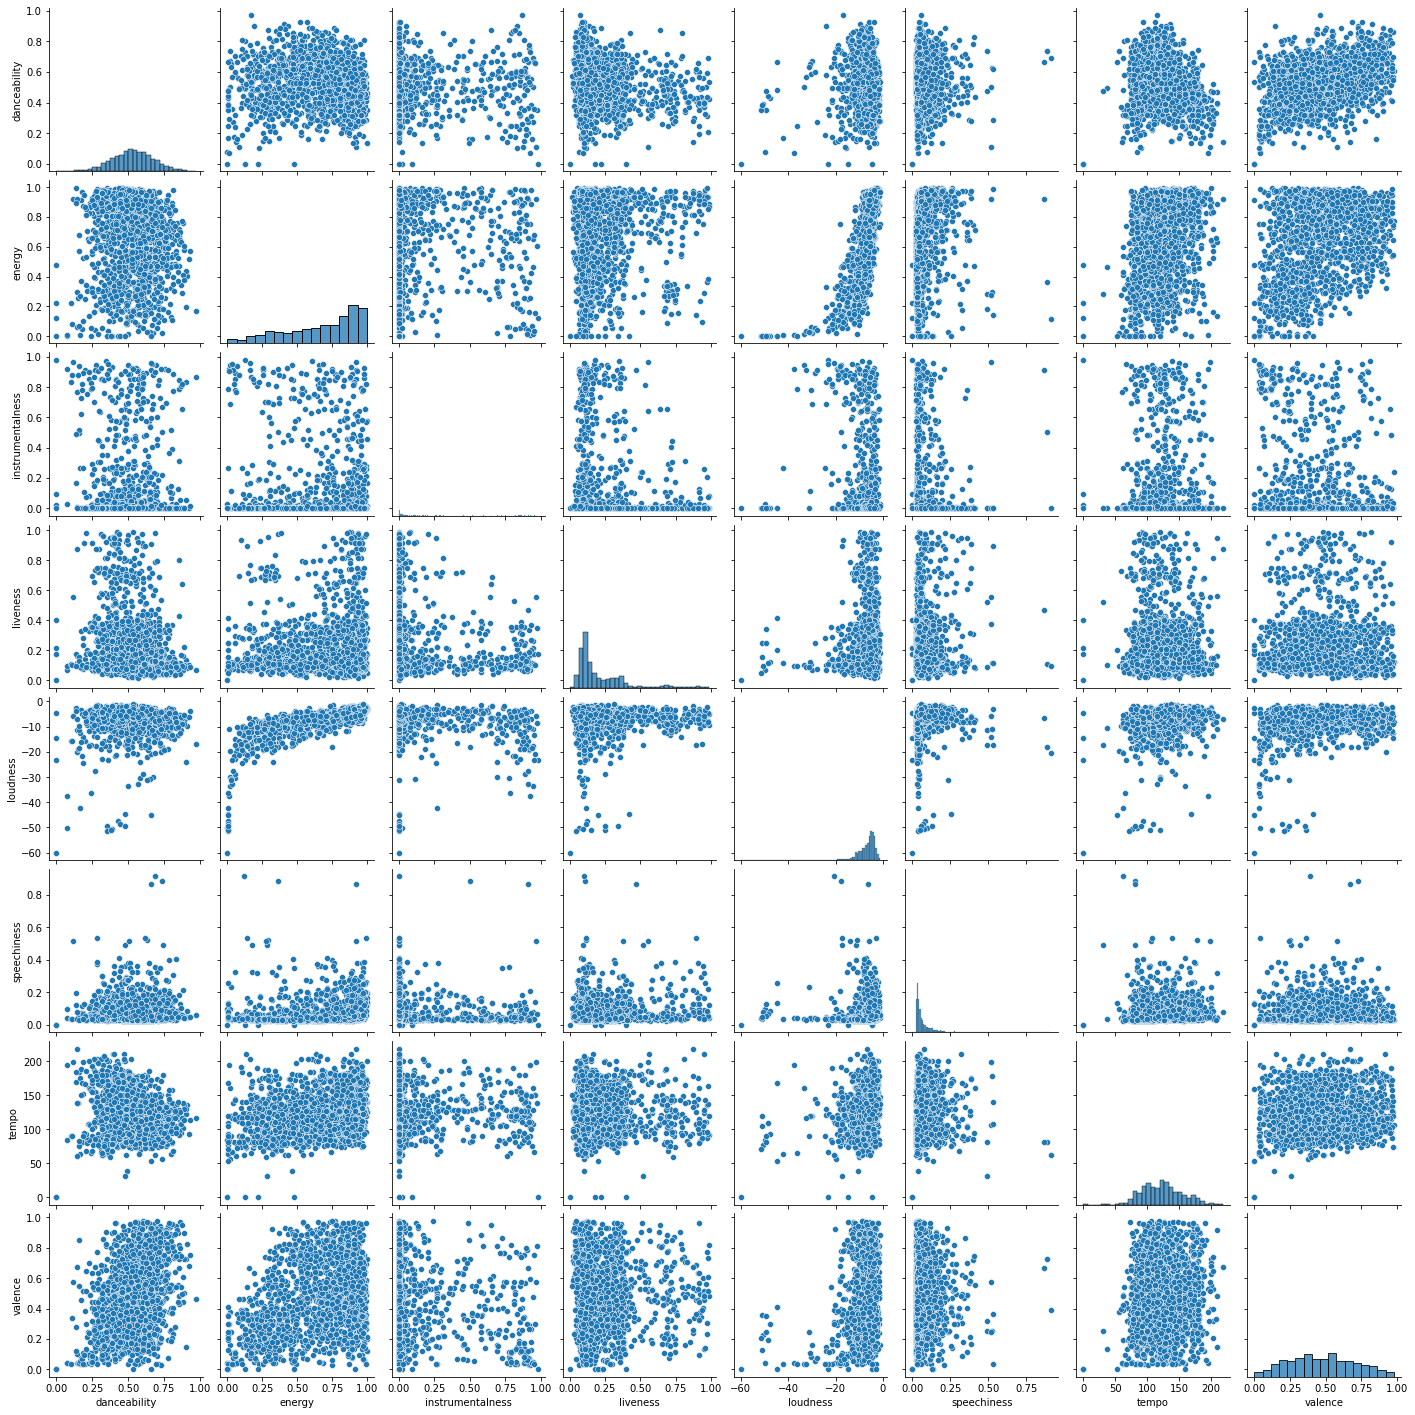

In [94]:
# a sumbset of the track features with only the numerical data
df_tf_num = df_track_feature_nodup[['danceability', 'energy', 
                               'instrumentalness', 'liveness', 'loudness', 
                               'speechiness', 'tempo', 'valence']]

# using pairplot from the seaborn package, there might be correlations between some of the features that will be revealed

sns.pairplot(data = df_tf_num, palette = 'mako')



I dont' see any strong linear correlations, but energy and loudness have a very interesting, almost logrithmic appearing relationship. 

## 7.2 Histogram Distributions 
I am interested in seeing the distribution of a few of the features, namely energy, tempo, and danceability. 

In [ ]:

dance = df_track_feature_nodup['danceability']
energy = df_track_feature_nodup['energy']
tempo = df_track_feature_nodup['tempo']

_, bins, _ = plt.hist(dance, bins=25, range=[0, 1])
_ = plt.hist(energy, bins=bins, alpha=0.5)
_ = plt.hist(tempo, bins=bins, alpha=0.5)

In [ ]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}

f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

ax = sns.heatmap(flights, ax=ax,

                 cbar_ax=cbar_ax,

                 cbar_kws={"orientation": "horizontal"})

In [99]:
pd.to_datetime(df_album_nodup['release_date']).dt.month

0       2
3      10
4       5
6      10
7      10
       ..
298     3
299     7
300     9
301     8
302     6
Name: release_date, Length: 131, dtype: int64

(array([16.,  7., 10., 12.,  6., 14.,  9., 13., 12., 13., 14.,  5.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

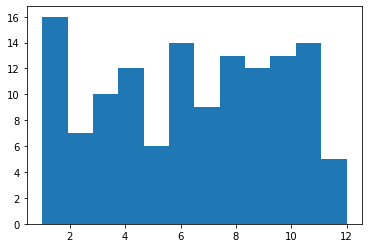

In [111]:
import calendar
import datetime
album_months = pd.to_datetime(df_album_nodup['release_date']).dt.month


plt.hist(album_months, bins=12, range=[1, 12])

In [154]:
database = r"db_files\spotify.db"

          


"""df_months = pd.DataFrame(sql_query, columns = ['Month'])
df_months.describe()
"""

conn = sqlite3.connect(database)
c = conn.cursor()
                 
c.execute('''
          SELECT
          strftime('%m', release_date) AS month
          FROM album
          ''')

df = pd.DataFrame(c.fetchall(), columns = ['month'])

df.describe()

type(df['month'][0])

df = df.astype({'month': 'int32'}).dtypes

#plt.hist(df['month'].astype('int32').dtypes, bins=12, range=[1, 12])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [ ]:
table_insert = [(df_artist, 'artist'), (df_album_nodup, 'album'), (df_track, 'track'),(df_track_feature_nodup
x = df_track_feature_nodup['energy']
y = df_track_feature_nodup['danceability']
sns.jointplot(x = 'Energy of a Song', data = ad_data, y = 'Danceability of a Song', color = 'blue', kind = 'kde', fill = True)